In [1]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# API Key
from config import apikey

In [ ]:
#https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=demo
base_url = "https://www.alphavantage.co/query?"
params = {
    "function":"TIME_SERIES_WEEKLY",
    "symbol":"",   #REMOVE AFTER VERIFYING
    "apikey":apikey
}

# Read in the stock data set
#stock_data = pd.read_csv('Resources/Stocks.csv')
#stock_data.head()


#function=TIME_SERIES_DAILY&symbol=MSFT&apikey=demo

In [2]:
#Using this code after the csv was created
stock_data = pd.read_csv('stock_export.csv')
stock_data.head()

,Unnamed: 0,Symbol,Name,Sector,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,...,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13
0,0,MMM,3M Company,Industrials,155.82,158.10,163.10,166.09,170.09,173.15,...,180.47,181.35,178.15,158.66,160.08,161.01,156.93,149.24,153.65,141.68
1,1,AOS,A.O. Smith Corp,Industrials,45.51,47.99,51.01,51.07,50.28,52.08,...,47.62,46.93,45.43,42.69,41.99,43.93,44.09,39.55,42.69,41.49
2,2,ABT,Abbott Laboratories,Health Care,81.99,79.63,82.79,81.65,82.66,83.74,...,85.36,89.00,90.40,87.14,87.87,89.66,87.45,77.03,81.74,81.65
3,3,ABBV,AbbVie Inc.,Health Care,74.66,73.63,76.46,76.53,81.75,85.21,...,89.06,88.00,83.54,81.02,92.29,94.05,94.96,85.71,88.82,85.37
4,4,ACN,Accenture plc,Information Technology,189.64,184.97,187.08,183.07,188.22,189.70,...,207.66,209.20,208.57,205.21,211.58,212.37,211.89,180.59,178.75,166.51


In [ ]:
#Implement the weeks we will want to add to the columns

Start_Week = "2019-10-04"
End_Week = "2020-03-13"
x= Start_Week
weeks = []

In [12]:
hardcode_weeks = ["2019-10-04", "2019-10-11","2019-10-18", "2019-10-25", "2019-11-01", "2019-11-08",
                  "2019-11-15", "2019-11-22", "2019-11-29", "2019-12-06", "2019-12-13", "2019-12-20",
                  "2019-12-27", "2020-01-03", "2020-01-10", "2020-01-17", "2020-01-24", "2020-01-31",
                  "2020-02-07", "2020-02-14", "2020-02-21", "2020-02-28", "2020-03-06", "2020-03-13"]

In [ ]:
hardcode_weeks[0]

In [ ]:
for item in hardcode_weeks:
    stock_data[item]=""

In [3]:
stock_data

,Unnamed: 0,Symbol,Name,Sector,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,...,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13
0,0,MMM,3M Company,Industrials,155.82,158.10,163.10,166.09,170.09,173.15,...,180.47,181.35,178.15,158.66,160.08,161.01,156.93,149.24,153.65,141.68
1,1,AOS,A.O. Smith Corp,Industrials,45.51,47.99,51.01,51.07,50.28,52.08,...,47.62,46.93,45.43,42.69,41.99,43.93,44.09,39.55,42.69,41.49
2,2,ABT,Abbott Laboratories,Health Care,81.99,79.63,82.79,81.65,82.66,83.74,...,85.36,89.00,90.40,87.14,87.87,89.66,87.45,77.03,81.74,81.65
3,3,ABBV,AbbVie Inc.,Health Care,74.66,73.63,76.46,76.53,81.75,85.21,...,89.06,88.00,83.54,81.02,92.29,94.05,94.96,85.71,88.82,85.37
4,4,ACN,Accenture plc,Information Technology,189.64,184.97,187.08,183.07,188.22,189.70,...,207.66,209.20,208.57,205.21,211.58,212.37,211.89,180.59,178.75,166.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,500,XYL,Xylem Inc.,Industrials,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,501,YUM,Yum! Brands Inc,Consumer Discretionary,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,502,ZBH,Zimmer Biomet Holdings,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,503,ZION,Zions Bancorp,Financials,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for index, row in stock_data[95:100].iterrows():
    params['symbol']=row["Symbol"]
    response = requests.get(base_url, params=params).json()
    
    for week in hardcode_weeks: 
        try:
            stock_data.loc[index,week]= response["Weekly Time Series"][week]["4. close"]
        except:
            pass
            
        
stock_data.to_csv("stock_export.csv",index=False)

In [4]:
stock_data[50:150]

,Unnamed: 0,Symbol,Name,Sector,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,...,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13
50,50,AIV,Apartment Investment & Management,Real Estate,53.32,53.55,54.48,54.29,55.23,53.17,...,51.52,52.75,54.02,52.71,53.37,54.80,55.49,47.84,49.81,46.05
51,51,AAPL,Apple Inc.,Information Technology,227.01,236.21,236.41,246.58,255.82,260.14,...,310.33,318.73,318.31,309.51,320.03,324.95,313.05,273.36,289.03,277.97
52,52,AMAT,Applied Materials Inc.,Information Technology,50.88,51.75,51.68,55.72,55.46,56.03,...,61.47,62.85,62.00,57.99,61.71,66.85,64.27,58.12,57.79,50.89
53,53,APTV,Aptiv Plc,Consumer Discretionary,83.43,86.26,88.96,89.58,92.35,96.88,...,89.51,91.53,91.54,84.79,87.13,88.32,90.07,78.11,76.29,66.47
54,54,ADM,Archer-Daniels-Midland Co,Consumer Staples,40.35,40.46,39.64,41.01,42.43,43.31,...,43.95,45.25,44.30,44.76,45.71,44.77,43.90,37.65,37.64,34.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,DLR,Digital Realty Trust Inc,Real Estate,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,146,DFS,Discover Financial Services,Financials,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,147,DISCA,Discovery Inc. Class A,Consumer Discretionary,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,148,DISCK,Discovery Inc. Class C,Consumer Discretionary,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
edit_df = stock_data.copy()

In [60]:
edit_df.replace('', np.nan, inplace=True)

In [61]:
edit_df.dropna(how="any", inplace = True)

In [64]:
edit_df["Difference"] = edit_df[hardcode_weeks[0]]-edit_df[hardcode_weeks[-1]]

In [65]:
edit_df

,Unnamed: 0,Symbol,Name,Sector,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
0,0,MMM,3M Company,Industrials,155.82,158.10,163.10,166.09,170.09,173.15,...,181.35,178.15,158.66,160.08,161.01,156.93,149.24,153.65,141.68,14.14
1,1,AOS,A.O. Smith Corp,Industrials,45.51,47.99,51.01,51.07,50.28,52.08,...,46.93,45.43,42.69,41.99,43.93,44.09,39.55,42.69,41.49,4.02
2,2,ABT,Abbott Laboratories,Health Care,81.99,79.63,82.79,81.65,82.66,83.74,...,89.00,90.40,87.14,87.87,89.66,87.45,77.03,81.74,81.65,0.34
3,3,ABBV,AbbVie Inc.,Health Care,74.66,73.63,76.46,76.53,81.75,85.21,...,88.00,83.54,81.02,92.29,94.05,94.96,85.71,88.82,85.37,-10.71
4,4,ACN,Accenture plc,Information Technology,189.64,184.97,187.08,183.07,188.22,189.70,...,209.20,208.57,205.21,211.58,212.37,211.89,180.59,178.75,166.51,23.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,93,CAT,Caterpillar Inc.,Industrials,121.04,128.40,130.71,139.73,144.49,148.16,...,147.78,140.38,131.35,133.37,137.99,137.21,124.24,121.41,99.64,21.40
94,94,CBOE,Cboe Global Markets,Financials,116.28,115.60,116.77,114.10,114.85,114.88,...,116.53,119.81,123.22,122.54,125.63,122.61,114.00,116.77,94.80,21.48
95,95,CBRE,CBRE Group,Real Estate,50.67,51.82,52.21,52.61,54.79,54.89,...,61.03,60.77,61.05,64.03,63.96,62.73,56.14,54.58,46.38,4.29
98,98,CNC,Centene Corporation,Health Care,43.57,44.27,46.88,48.23,52.13,55.06,...,64.54,66.61,62.81,63.16,64.94,65.49,53.02,58.56,63.57,-20.00


In [66]:
edit_df.to_csv("100_only_stock_export.csv",index=False)

In [109]:
sector_df = edit_df.copy()

In [110]:
sector_df = sector_df.drop(["Symbol","Name","Unnamed: 0"], axis=1)
sector_df = sector_df.set_index(["Sector"])
sector_df

,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,2019-12-06,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
Sector,,,,,,,,,,,,,,,,,,,,,
Industrials,155.82,158.10,163.10,166.09,170.09,173.15,171.88,167.60,169.77,171.47,...,181.35,178.15,158.66,160.08,161.01,156.93,149.24,153.65,141.68,14.14
Industrials,45.51,47.99,51.01,51.07,50.28,52.08,50.78,48.20,48.40,46.79,...,46.93,45.43,42.69,41.99,43.93,44.09,39.55,42.69,41.49,4.02
Health Care,81.99,79.63,82.79,81.65,82.66,83.74,85.71,83.74,85.45,85.48,...,89.00,90.40,87.14,87.87,89.66,87.45,77.03,81.74,81.65,0.34
Health Care,74.66,73.63,76.46,76.53,81.75,85.21,88.63,86.05,87.73,86.98,...,88.00,83.54,81.02,92.29,94.05,94.96,85.71,88.82,85.37,-10.71
Information Technology,189.64,184.97,187.08,183.07,188.22,189.70,196.81,196.66,201.16,202.55,...,209.20,208.57,205.21,211.58,212.37,211.89,180.59,178.75,166.51,23.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Industrials,121.04,128.40,130.71,139.73,144.49,148.16,145.31,143.88,144.73,142.72,...,147.78,140.38,131.35,133.37,137.99,137.21,124.24,121.41,99.64,21.40
Financials,116.28,115.60,116.77,114.10,114.85,114.88,119.49,123.77,118.90,120.59,...,116.53,119.81,123.22,122.54,125.63,122.61,114.00,116.77,94.80,21.48
Real Estate,50.67,51.82,52.21,52.61,54.79,54.89,56.44,54.91,57.02,58.50,...,61.03,60.77,61.05,64.03,63.96,62.73,56.14,54.58,46.38,4.29


In [111]:
sector_df[hardcode_weeks]= sector_df[hardcode_weeks].apply(pd.to_numeric, errors = "coerce")

In [112]:
sector_df = sector_df.groupby(["Sector"]).mean()

In [113]:
sector_df

,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,2019-12-06,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
Sector,,,,,,,,,,,,,,,,,,,,,
Consumer Discretionary,583.925556,586.522222,597.758889,606.008889,610.143333,595.255556,586.632222,588.127778,599.860000,596.717778,...,621.735556,607.886667,597.035556,614.103333,629.635556,621.171111,561.225556,554.725556,508.078889,75.846667
Consumer Staples,43.113333,43.300000,43.843333,44.756667,44.676667,45.323333,46.040000,46.183333,46.400000,47.356667,...,48.096667,47.780000,46.893333,46.936667,46.193333,45.916667,41.046667,43.850000,41.330000,1.783333
Energy,20.870000,20.403333,20.720000,21.086667,21.380000,21.683333,21.590000,20.740000,20.213333,19.426667,...,24.363333,22.493333,21.063333,21.733333,21.380000,21.273333,18.313333,17.716667,13.056667,7.813333
Financials,117.370937,117.874375,119.219687,121.005000,123.338750,126.453750,127.121875,126.646875,128.183750,128.476875,...,133.862500,133.301250,132.413125,137.343125,139.796875,138.520000,118.713125,116.071875,102.550625,14.820312
Health Care,121.530625,122.656250,126.126875,132.038750,137.385000,138.171250,140.074375,142.211875,143.589375,143.870625,...,148.343125,144.525000,138.301875,145.253750,148.789375,147.857500,132.204375,136.691250,130.002500,-8.471875
Industrials,109.862727,111.503182,110.243182,113.190000,113.852727,115.783636,117.285455,116.260000,116.769091,115.772273,...,114.400000,112.650909,108.082727,110.931818,112.840000,110.318182,96.340909,94.969091,79.113636,30.749091
Information Technology,267.699412,268.885882,271.388235,273.966471,277.060588,284.585294,290.459412,286.165000,290.745882,294.737059,...,321.927059,321.238235,313.031765,323.905882,332.062941,324.788529,290.533529,284.257059,265.710588,1.988824
Materials,116.072500,118.045000,118.252500,118.890000,118.952500,125.082500,126.185000,124.372500,124.535000,122.505000,...,130.465000,131.685000,130.602500,136.405000,140.250000,139.552500,121.602500,127.295000,111.072500,5.000000
Real Estate,138.738333,138.345000,140.053333,138.901667,139.773333,136.005000,139.146667,137.798333,140.048333,140.078333,...,144.288333,146.385000,144.790000,147.596667,154.116667,151.168333,135.365000,141.901667,131.563333,7.175000


In [114]:
sector_df.to_csv("100_only_bysector_export.csv",index=False)

In [107]:
#sector_df = sector_df.T

In [115]:
sector_df

,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,2019-12-06,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
Sector,,,,,,,,,,,,,,,,,,,,,
Consumer Discretionary,583.925556,586.522222,597.758889,606.008889,610.143333,595.255556,586.632222,588.127778,599.860000,596.717778,...,621.735556,607.886667,597.035556,614.103333,629.635556,621.171111,561.225556,554.725556,508.078889,75.846667
Consumer Staples,43.113333,43.300000,43.843333,44.756667,44.676667,45.323333,46.040000,46.183333,46.400000,47.356667,...,48.096667,47.780000,46.893333,46.936667,46.193333,45.916667,41.046667,43.850000,41.330000,1.783333
Energy,20.870000,20.403333,20.720000,21.086667,21.380000,21.683333,21.590000,20.740000,20.213333,19.426667,...,24.363333,22.493333,21.063333,21.733333,21.380000,21.273333,18.313333,17.716667,13.056667,7.813333
Financials,117.370937,117.874375,119.219687,121.005000,123.338750,126.453750,127.121875,126.646875,128.183750,128.476875,...,133.862500,133.301250,132.413125,137.343125,139.796875,138.520000,118.713125,116.071875,102.550625,14.820312
Health Care,121.530625,122.656250,126.126875,132.038750,137.385000,138.171250,140.074375,142.211875,143.589375,143.870625,...,148.343125,144.525000,138.301875,145.253750,148.789375,147.857500,132.204375,136.691250,130.002500,-8.471875
Industrials,109.862727,111.503182,110.243182,113.190000,113.852727,115.783636,117.285455,116.260000,116.769091,115.772273,...,114.400000,112.650909,108.082727,110.931818,112.840000,110.318182,96.340909,94.969091,79.113636,30.749091
Information Technology,267.699412,268.885882,271.388235,273.966471,277.060588,284.585294,290.459412,286.165000,290.745882,294.737059,...,321.927059,321.238235,313.031765,323.905882,332.062941,324.788529,290.533529,284.257059,265.710588,1.988824
Materials,116.072500,118.045000,118.252500,118.890000,118.952500,125.082500,126.185000,124.372500,124.535000,122.505000,...,130.465000,131.685000,130.602500,136.405000,140.250000,139.552500,121.602500,127.295000,111.072500,5.000000
Real Estate,138.738333,138.345000,140.053333,138.901667,139.773333,136.005000,139.146667,137.798333,140.048333,140.078333,...,144.288333,146.385000,144.790000,147.596667,154.116667,151.168333,135.365000,141.901667,131.563333,7.175000


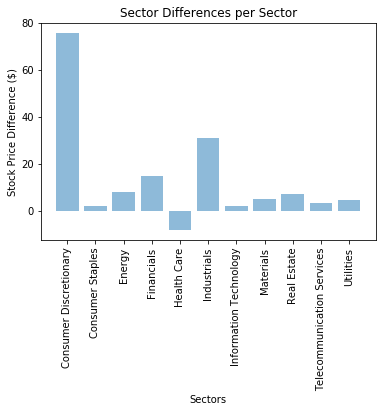

In [134]:
x=sector_df.index
y=sector_df["Difference"]

plt.bar(x, y, align='center', alpha=0.5)
plt.title("Sector Differences per Sector")
plt.xlabel("Sectors")
plt.ylabel("Stock Price Difference ($)")
plt.xticks(rotation=90)

plt.show()